#### Importeer de juiste libraries

In [9]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from random import sample

%matplotlib inline

#### Laad en bekijk de data

In [10]:
data = pd.read_csv('../../../data/Airlinesatisfaction.csv')

In [11]:
list(data.columns)

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

Verwijder de kolommen waarvan de titel niet aangeeft wat de feature betekent. 

In [12]:
data = data.drop(columns = ["Unnamed: 0",
 "id"], axis=1)

In [13]:
list(data.columns)

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [15]:
#We dienen voordat we normaliseren de nominale en eventuele ordinale schalen om te zetten in cijfers
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

#### Plot histogrammen

array([[<AxesSubplot: title={'center': 'Departure Delay in Minutes'}>]],
      dtype=object)

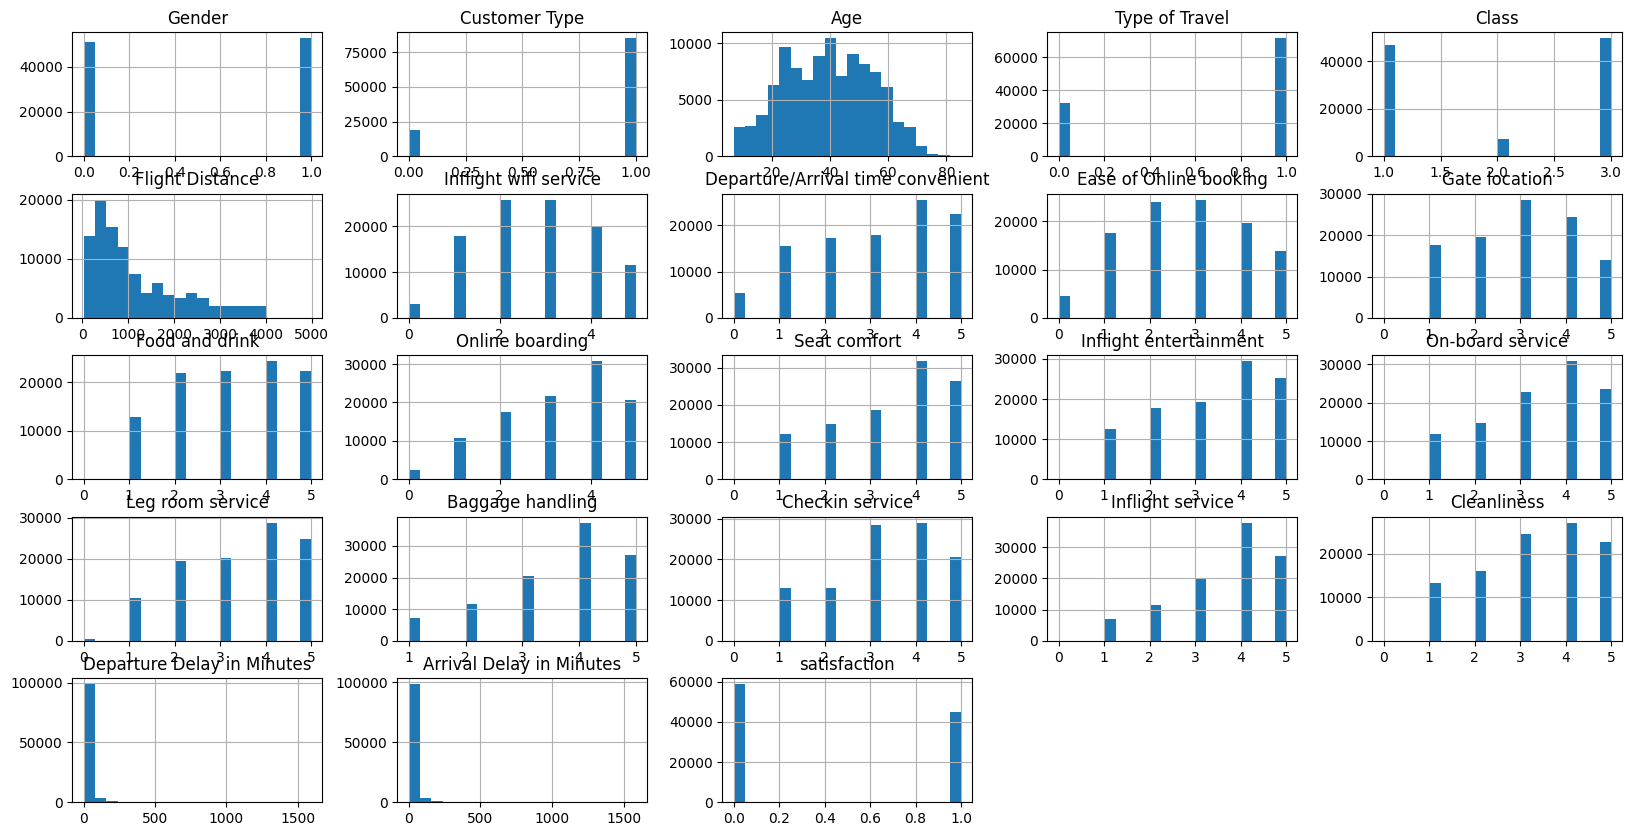

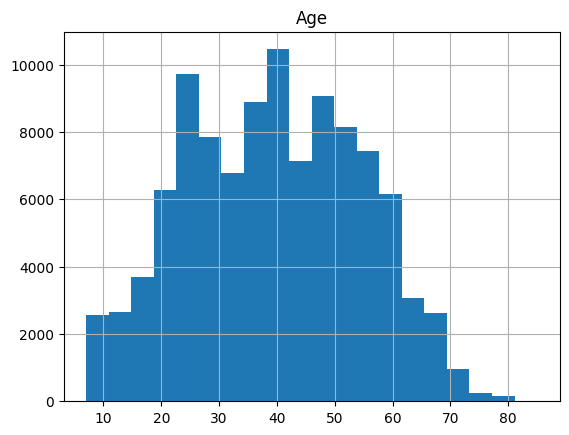

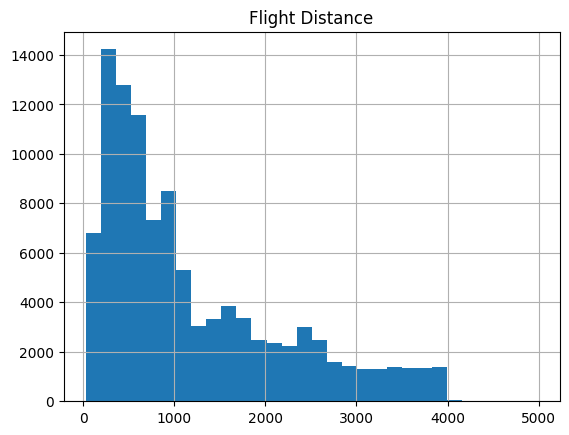

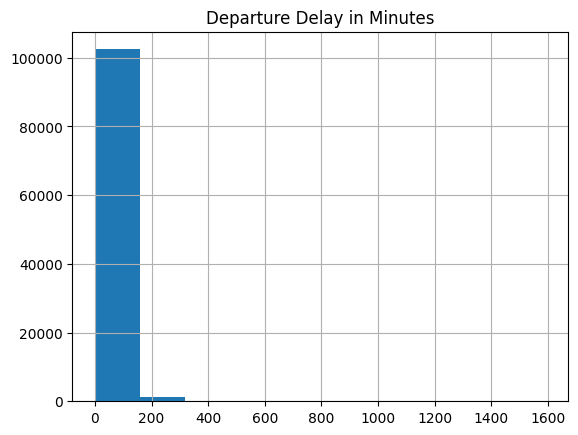

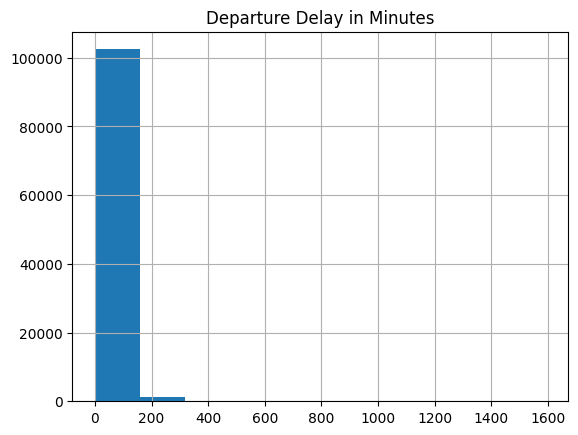

In [16]:
# Als je alle data tegelijk wil plotten:
data.hist(bins = 20, figsize = (20,10))
# Als je maar 1 variabele wil plotten
data.hist(column = "Age", bins = 20)
data.hist(column = "Flight Distance", bins = 30)
data.hist(column = "Departure Delay in Minutes", bins = 10)


In [ ]:
#Tijd voor de boxplotten
import seaborn as sns
sns.boxplot(x=data['Age'])

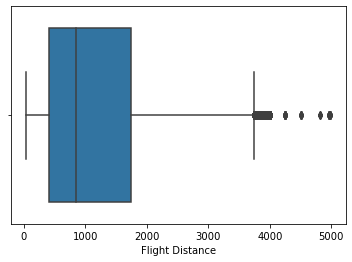

In [ ]:
sns.boxplot(x=data['Flight Distance'])


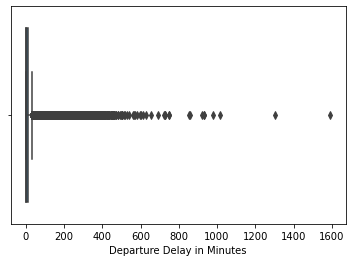

In [ ]:
sns.boxplot(x=data['Departure Delay in Minutes'])

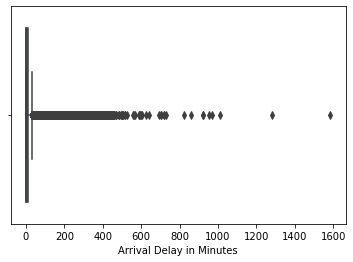

In [ ]:
sns.boxplot(x=data['Arrival Delay in Minutes'])

#### Check of de data normaal verdeeld is met Shapiro-Wilk

In [ ]:
#Je kan dit voor elke feature doen.
test = stats.shapiro(data.Age)


    
print(test.pvalue)

0.0


/Users/dickheinhuis/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#Het kan ook met Kolmogorov Smirnov
stats.kstest(data['Age'], stats.norm.cdf)

KstestResult(statistic=0.9999999999987201, pvalue=0.0)

#### Zet de features om in z-scores (normaliseren)

In [ ]:
print(data[0:5])
scaler = StandardScaler()
data_z = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
print(data_z[0:5])

   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              1   13               0      2              460   
1       0              0   25               1      3              235   
2       1              1   26               1      3             1142   
3       1              1   25               1      3              562   
4       0              1   61               1      3              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d585e52b0>]],
      dtype=object)

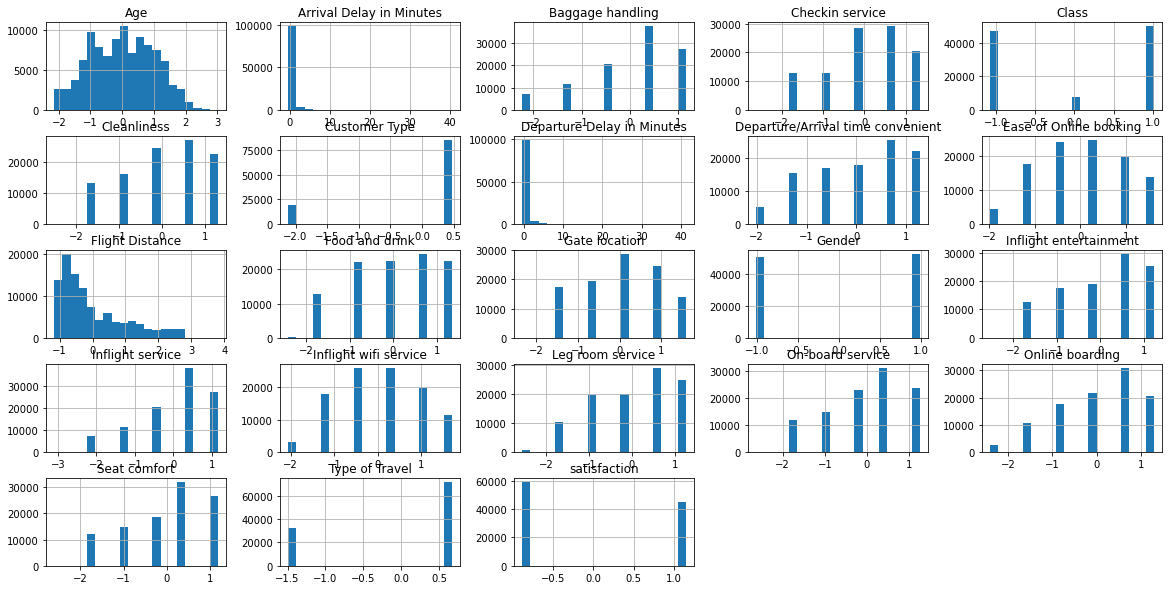

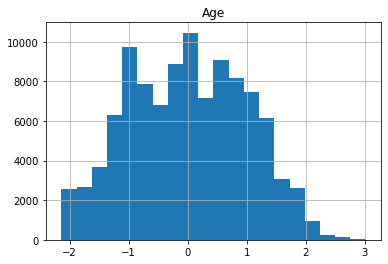

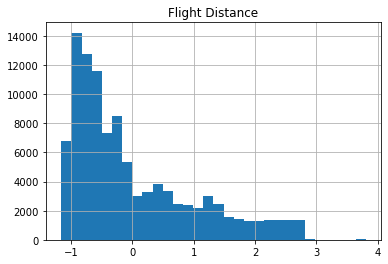

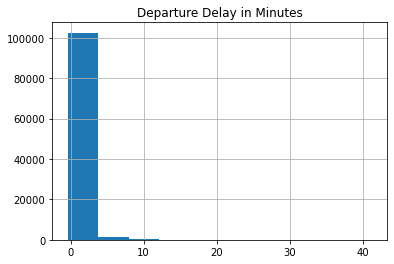

In [ ]:
#Nu met de z scores
# Als je alle data tegelijk wil plotten:
data_z.hist(bins = 20, figsize = (20,10))
# Als je maar 1 variabele wil plotten
data_z.hist(column = "Age", bins = 20)
data_z.hist(column = "Flight Distance", bins = 30)
data_z.hist(column = "Departure Delay in Minutes", bins = 10)

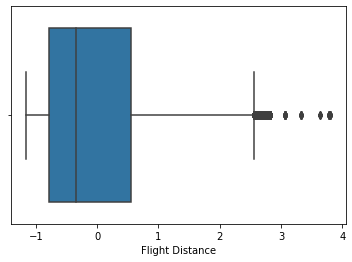

In [ ]:
#Een boxplot met z scores
sns.boxplot(x=data_z['Flight Distance'])

#### Maak heatmap en scatter matrix

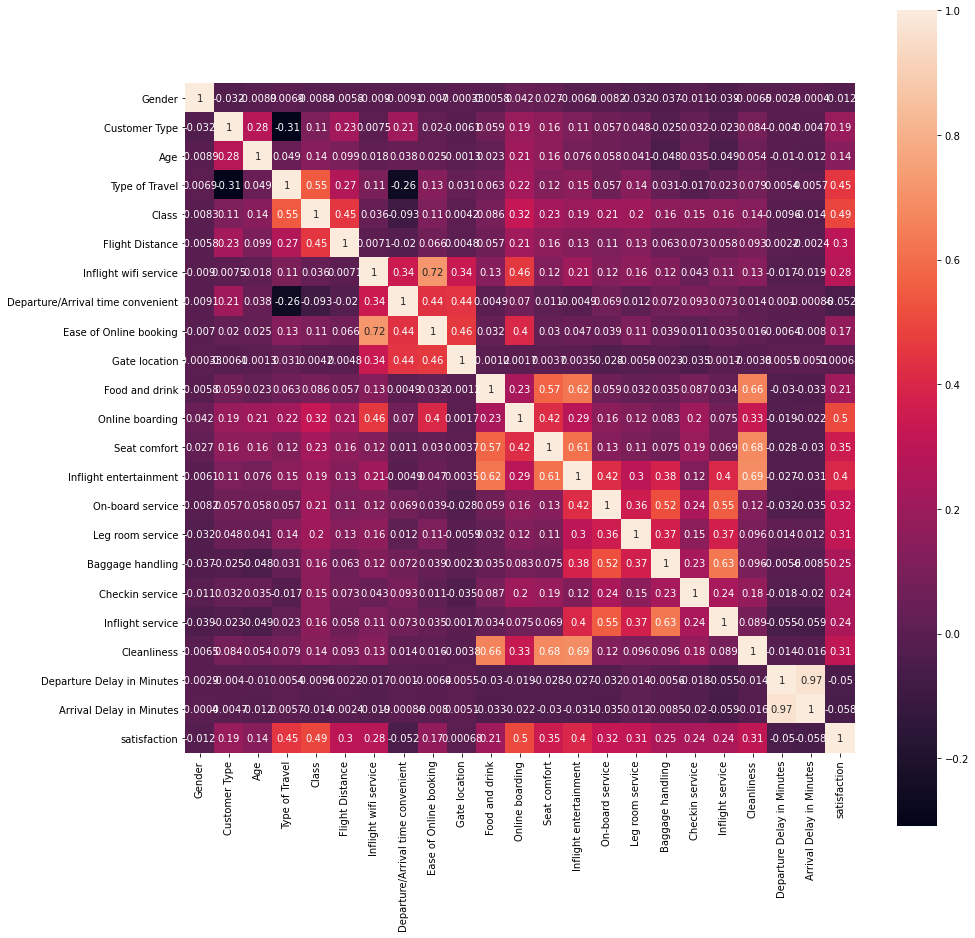

In [ ]:
# Heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, square = True)

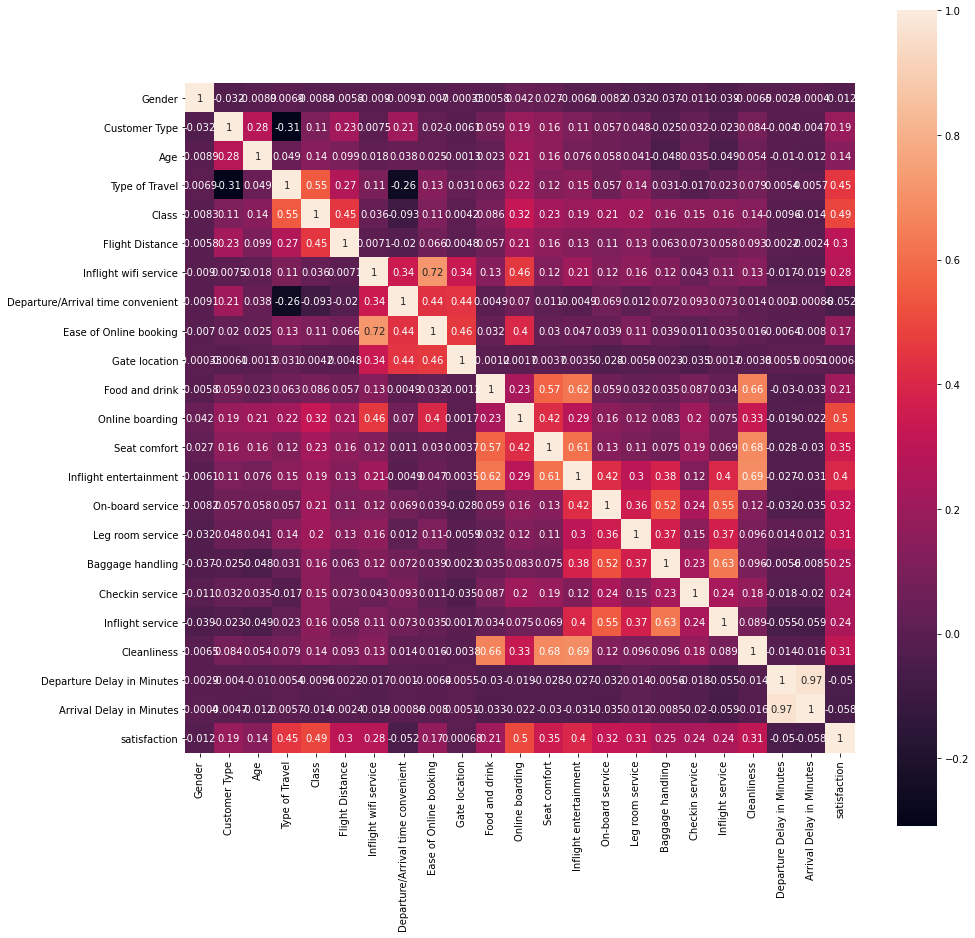

In [ ]:
#Nu met z scores
# Heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(data_z.corr(), annot = True, square = True)

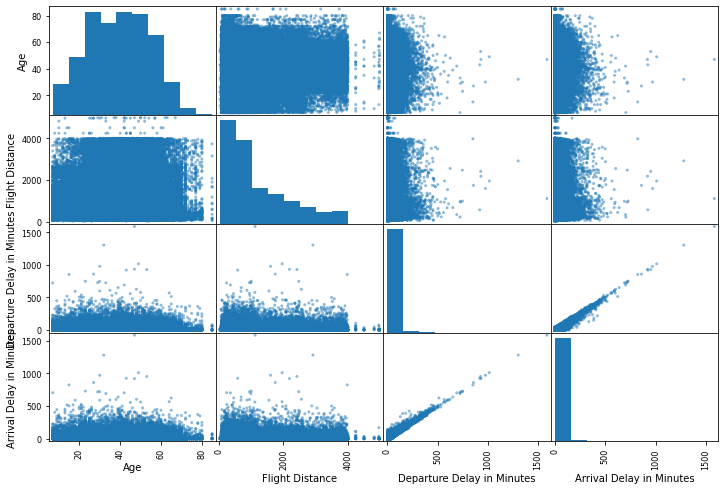

In [ ]:
# Scatter matrix
attributes = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
scatter_matrix(data[attributes], figsize = (12, 8))
plt.show()

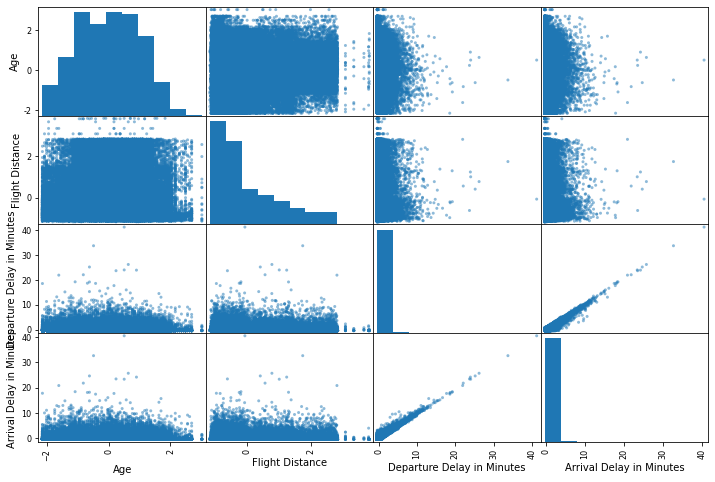

In [ ]:
#Nu met de z scores
# Scatter matrix
attributes = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
scatter_matrix(data_z[attributes], figsize = (12, 8))
plt.show()

In [ ]:
# Correlatie
corr_matrix = data.corr()
print(corr_matrix["Arrival Delay in Minutes"]) # Voor de correlatie met 1 variabele
#print(corr_matrix) # Voor de hele matrix

Gender                              -0.000396
Customer Type                       -0.004747
Age                                 -0.012147
Type of Travel                       0.005683
Class                               -0.013674
Flight Distance                     -0.002426
Inflight wifi service               -0.019095
Departure/Arrival time convenient   -0.000864
Ease of Online booking              -0.007984
Gate location                        0.005143
Food and drink                      -0.032524
Online boarding                     -0.021949
Seat comfort                        -0.029900
Inflight entertainment              -0.030703
On-board service                    -0.035227
Leg room service                     0.011843
Baggage handling                    -0.008542
Checkin service                     -0.020369
Inflight service                    -0.059196
Cleanliness                         -0.015774
Departure Delay in Minutes           0.965481
Arrival Delay in Minutes          

In [ ]:
print(corr_matrix) 
# Voor de hele matrix

                                     Gender  Customer Type       Age  \
Gender                             1.000000      -0.031732 -0.008928   
Customer Type                     -0.031732       1.000000  0.281674   
Age                               -0.008928       0.281674  1.000000   
Type of Travel                     0.006909      -0.308333  0.048524   
Class                             -0.008253       0.105735  0.140565   
Flight Distance                   -0.005828       0.225200  0.099461   
Inflight wifi service             -0.008974       0.007543  0.017859   
Departure/Arrival time convenient -0.009142       0.206869  0.038125   
Ease of Online booking            -0.006951       0.019509  0.024842   
Gate location                     -0.000333      -0.006078 -0.001330   
Food and drink                    -0.005772       0.059454  0.023000   
Online boarding                    0.042260       0.189262  0.208939   
Seat comfort                       0.026502       0.159484  0.16

In [ ]:
#Tijd voor meer overzicht
import pingouin as pg

In [ ]:
#Correlatie tussen alle variabelen in een tabel
data.iloc[:, 0:25].rcorr()

/Users/dickheinhuis/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/dickheinhuis/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,-,***,**,*,**,,**,**,*,,...,*,**,***,***,***,***,*,,,***
Customer Type,-0.032,-,***,***,***,***,*,***,***,,...,***,***,***,***,***,***,***,,,***
Age,-0.009,0.282,-,***,***,***,***,***,***,,...,***,***,***,***,***,***,***,**,***,***
Type of Travel,0.007,-0.308,0.049,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,,,***
Class,-0.008,0.106,0.141,0.545,-,***,***,***,***,,...,***,***,***,***,***,***,***,**,***,***
Flight Distance,-0.006,0.225,0.099,0.267,0.451,-,*,***,***,,...,***,***,***,***,***,***,***,,,***
Inflight wifi service,-0.009,0.008,0.018,0.105,0.036,0.007,-,***,***,***,...,***,***,***,***,***,***,***,***,***,***
Departure/Arrival time convenient,-0.009,0.207,0.038,-0.26,-0.093,-0.02,0.344,-,***,***,...,,***,***,***,***,***,***,,,***
Ease of Online booking,-0.007,0.02,0.025,0.134,0.106,0.066,0.716,0.437,-,***,...,***,***,***,***,***,***,***,*,*,***
Gate location,-0.0,-0.006,-0.001,0.031,0.004,0.005,0.336,0.445,0.459,-,...,,***,,,***,,,,,


In [ ]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
data.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

,Gender,Customer Type,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Gender,-,0.000,0.004,0.060,0.344,0.899
Customer Type,-0.032,-,0.,0.,0.193,0.127
Age,-0.009,0.282,-,0.000,0.001,0.000
Flight Distance,-0.006,0.225,0.099,-,0.487,0.435
Departure Delay in Minutes,-0.003,-0.004,-0.01,0.002,-,0.
Arrival Delay in Minutes,-0.0,-0.005,-0.012,-0.002,0.965,-


In [ ]:
#Een alternatieve methode
#De r en p waardes
data[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].rcorr(stars=False)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,-,0.000,0.001,0.000
Flight Distance,0.099,-,0.487,0.435
Departure Delay in Minutes,-0.01,0.002,-,0.
Arrival Delay in Minutes,-0.012,-0.002,0.965,-


#### Maak een regressiemodel met Arrival Delay  als y (target value) en Flight Distance als x (feature matrix). Opnieuw Arrival Delay als afhankelijke variabel (target value) maar nu met behulp van Age en Departure Delay.



In [ ]:
#De variabele Arrival Delay heeft missing values; die moeten er eerst uit
data.dropna(inplace=True)

In [ ]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(data['Flight Distance'], data['Arrival Delay in Minutes'])
lm.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,15.290630,0.187126,81.713157,0.000000,0.000006,-0.000004,14.923866,15.657393
1,Flight Distance,-0.000094,0.000121,-0.780767,0.434941,0.000006,-0.000004,-0.000330,0.000142


In [ ]:
lm = pg.linear_regression(data[['Flight Distance', 'Departure Delay in Minutes','Age']], data['Arrival Delay in Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.11,0.09,11.88,0.00,0.93,0.93,0.92,1.29
1,Flight Distance,-0.00,0.00,-5.01,0.00,0.93,0.93,-0.00,-0.00
2,Departure Delay in Minutes,0.98,0.00,1193.11,0.00,0.93,0.93,0.98,0.98
3,Age,-0.00,0.00,-2.39,0.02,0.93,0.93,-0.01,-0.00


In [ ]:
lm = pg.linear_regression(data[['Departure Delay in Minutes','Age']], data['Arrival Delay in Minutes'])
lm.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.959472,0.088360,10.858686,0.00000,0.932159,0.932158,0.786288,1.132656
1,Departure Delay in Minutes,0.980197,0.000822,1192.957861,0.00000,0.932159,0.932158,0.978587,0.981808
2,Age,-0.006010,0.002072,-2.900237,0.00373,0.932159,0.932158,-0.010072,-0.001948


In [ ]:
#Nu met de z scores, dan zijn de coefficienten te vergelijken en onafhankelijk van de meeteenheid
data_z.dropna(inplace=True)
lm = pg.linear_regression(data_z[['Departure Delay in Minutes','Age']], data_z['Arrival Delay in Minutes'])
lm.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.001714,0.000809,2.118450,0.034139,0.932159,0.932158,0.000128,0.003301
1,Departure Delay in Minutes,0.968349,0.000812,1192.957861,0.000000,0.932159,0.932158,0.966758,0.969940
2,Age,-0.002347,0.000809,-2.900237,0.003730,0.932159,0.932158,-0.003934,-0.000761


In [ ]:
#Nu met de z scores, dan zijn de coefficienten te vergelijken en onafhankelijk van de meeteenheid
data_z.dropna(inplace=True)
lm = pg.linear_regression(data_z[['Flight Distance', 'Departure Delay in Minutes','Age']], data_z['Arrival Delay in Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.00,0.0,2.12,0.03,0.93,0.93,0.00,0.00
1,Flight Distance,-0.00,0.0,-5.01,0.00,0.93,0.93,-0.01,-0.00
2,Departure Delay in Minutes,0.97,0.0,1193.11,0.00,0.93,0.93,0.97,0.97
3,Age,-0.00,0.0,-2.39,0.02,0.93,0.93,-0.00,-0.00


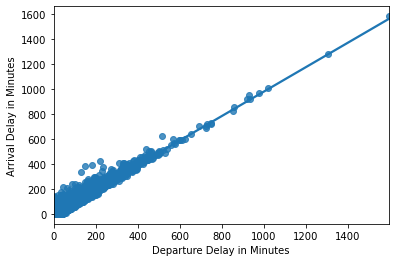

In [ ]:
sns.regplot(x="Departure Delay in Minutes", y="Arrival Delay in Minutes", data=data)